# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | nowrangapur
City not found. Skipping...
Processing Record 6 of Set 1 | mykhaylivka
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | taulaga
Processing Record 12 of Set 1 | yakeshi
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | salina cruz
Processing Record 15 of Set 1 | kondovo
Processing Record 16 of Set 1 | santa elena de uairen
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | carnarvon
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,18.28,65,78,6.22,PN,1724384168
1,qaqortoq,60.7167,-46.0333,8.01,60,96,1.86,GL,1724384244
2,laguna,38.4210,-121.4238,20.69,65,0,5.66,US,1724384246
3,ushuaia,-54.8000,-68.3000,6.81,70,75,7.72,AR,1724383968
4,mykhaylivka,47.2724,35.2224,22.45,64,19,2.95,UA,1724384249


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.28,65,78,6.22,PN,1724384168
1,qaqortoq,60.7167,-46.0333,8.01,60,96,1.86,GL,1724384244
2,laguna,38.4210,-121.4238,20.69,65,0,5.66,US,1724384246
3,ushuaia,-54.8000,-68.3000,6.81,70,75,7.72,AR,1724383968
4,mykhaylivka,47.2724,35.2224,22.45,64,19,2.95,UA,1724384249


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

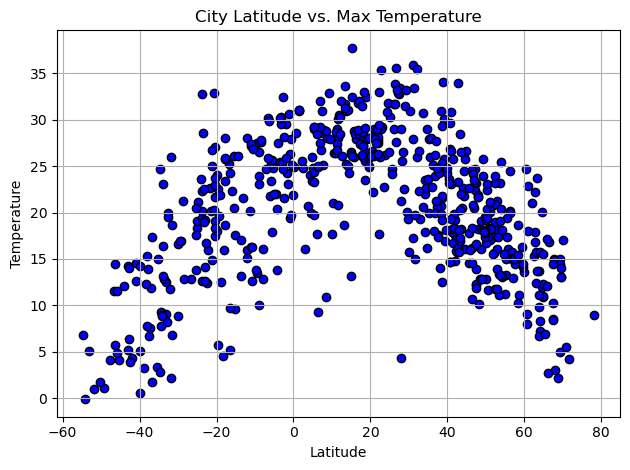

In [154]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

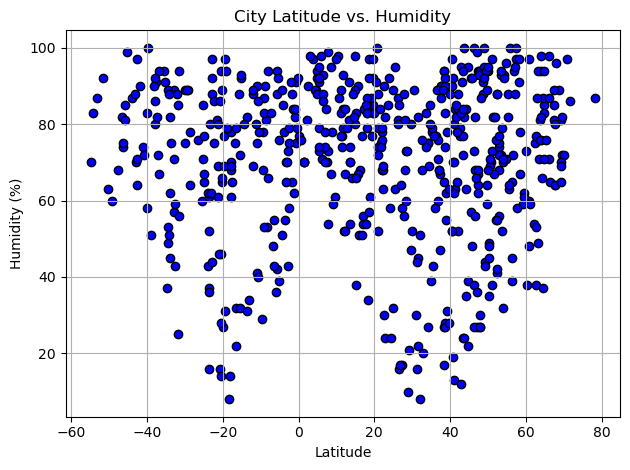

In [155]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

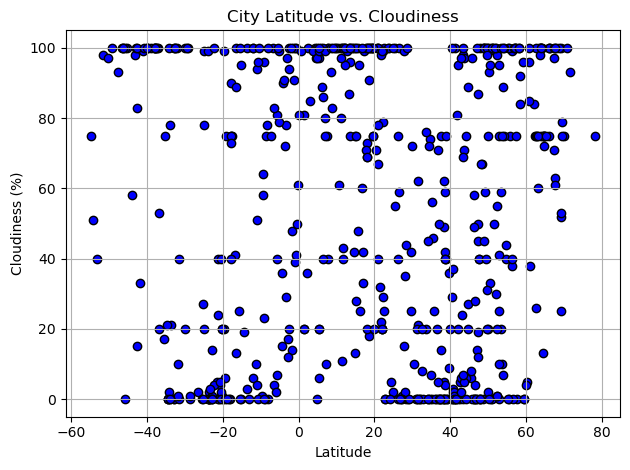

In [156]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

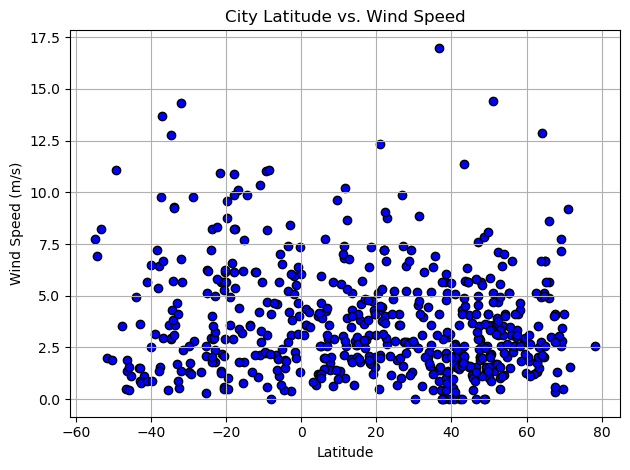

In [157]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [159]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label="Lat", y_label="Max Temp", title=(f"Linear Regression Plot")):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10, 6))
    plt.subplots_adjust(top=0.85)
    plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.text(
        0.25, 1.00, line_eq, 
        transform=plt.gca().transAxes, 
        fontsize=10, color="red", 
        verticalalignment='top', 
        horizontalalignment='right'
    )
    r_squared_text = (f"The r-squared is {rvalue**2}")
    plt.text(
        0.25, 1.20, r_squared_text, 
        transform=plt.gca().transAxes, 
        fontsize=10, color="green", 
        verticalalignment='top', 
        horizontalalignment='right'
    )
    plt.grid(True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    print(f"The r-squared is {rvalue**2}")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,8.01,60,96,1.86,GL,1724384244
2,laguna,38.4210,-121.4238,20.69,65,0,5.66,US,1724384246
4,mykhaylivka,47.2724,35.2224,22.45,64,19,2.95,UA,1724384249
5,colonia,50.9333,6.9500,18.31,70,0,5.14,DE,1724384027
8,tiksi,71.6872,128.8694,4.20,86,93,1.54,RU,1724384253


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.28,65,78,6.22,PN,1724384168
3,ushuaia,-54.8000,-68.3000,6.81,70,75,7.72,AR,1724383968
6,waitangi,-43.9535,-176.5597,12.12,87,58,4.92,NZ,1724384251
7,port-aux-francais,-49.3500,70.2167,1.09,60,100,11.09,TF,1724384252
9,taulaga,-11.0553,-171.0883,27.21,75,51,10.36,AS,1724384255


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is 0.4710331130286139


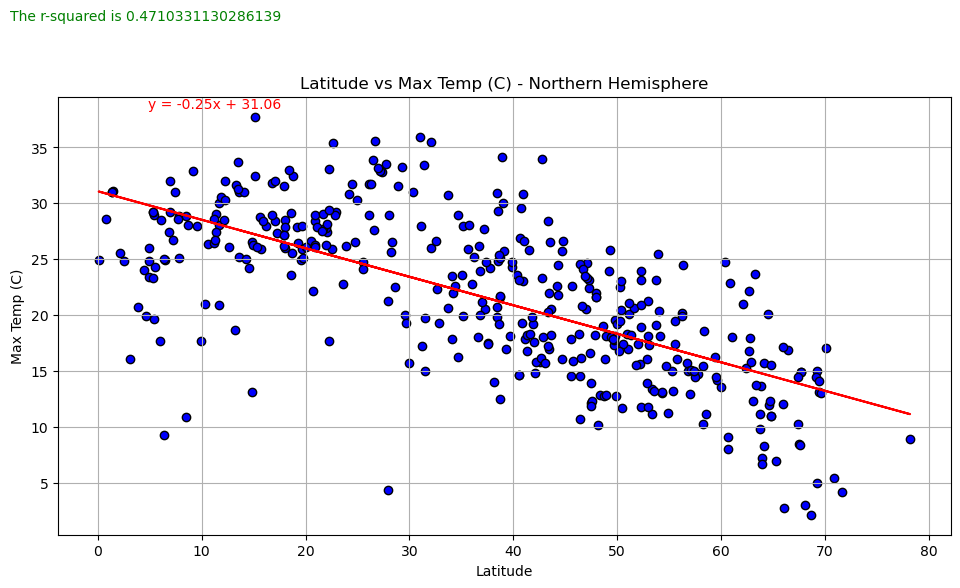

In [178]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression_plot(x_values, y_values, x_label="Latitude", y_label="Max Temp (C)", title=(f"Latitude vs Max Temp (C) - Northern Hemisphere"))


The r-squared is 0.5030025583297991


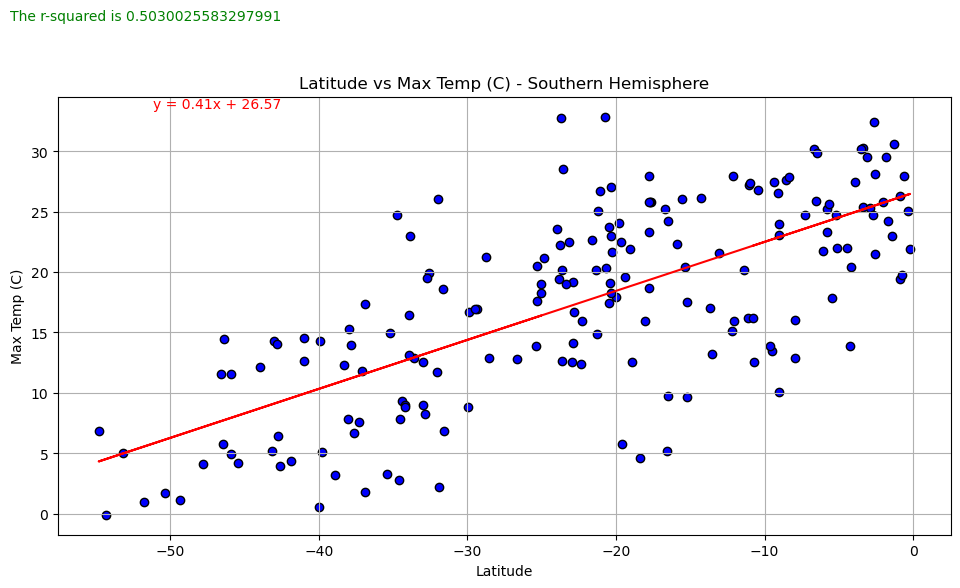

In [179]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression_plot(x_values, y_values, x_label="Latitude", y_label="Max Temp (C)", title=(f"Latitude vs Max Temp (C) - Southern Hemisphere"))


**Discussion about the linear relationship:** The closer you get to the equator of Earth (Latitude 0) the higher the temperature becomes. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is 0.0023846950456112583


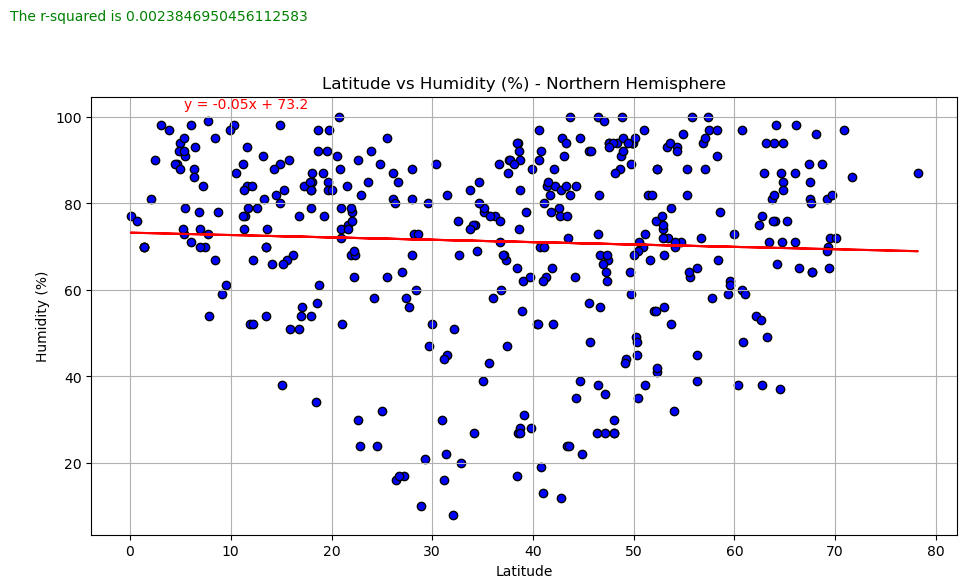

In [180]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression_plot(x_values, y_values, x_label="Latitude", y_label="Humidity (%)", title=(f"Latitude vs Humidity (%) - Northern Hemisphere"))

The r-squared is 0.013775984245182414


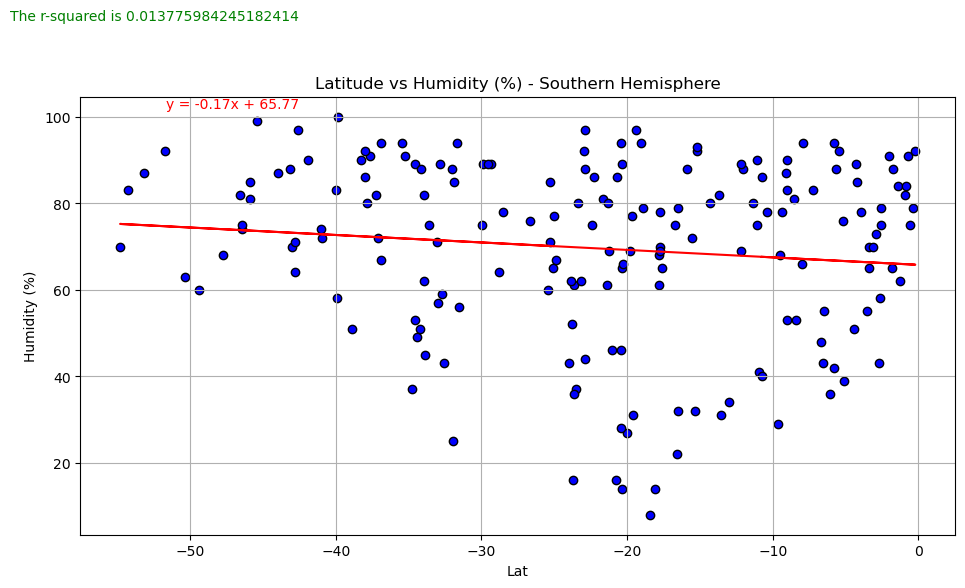

In [181]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression_plot(x_values, y_values, x_label="Lat", y_label="Humidity (%)", title=(f"Latitude vs Humidity (%) - Southern Hemisphere"))

**Discussion about the linear relationship:** There seems to be a slight trend of humidity increasing as you approach the equator in the northern hemisphere and there seems to be a slight trend of cloudiness increasing as you head further away from them the equator in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is 0.0043643227148090335


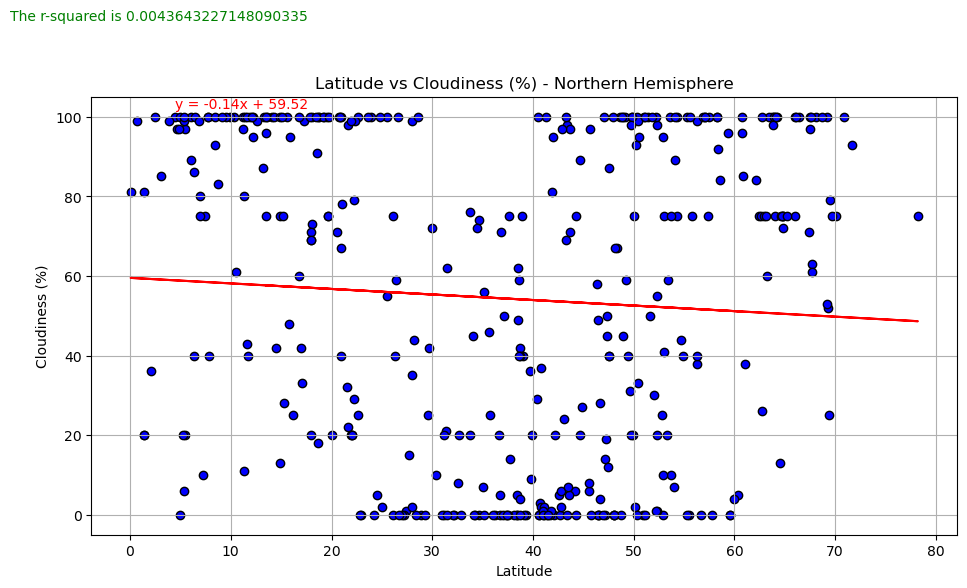

In [182]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression_plot(x_values, y_values, x_label="Latitude", y_label="Cloudiness (%)", title=(f"Latitude vs Cloudiness (%) - Northern Hemisphere"))

The r-squared is 0.013736897446122127


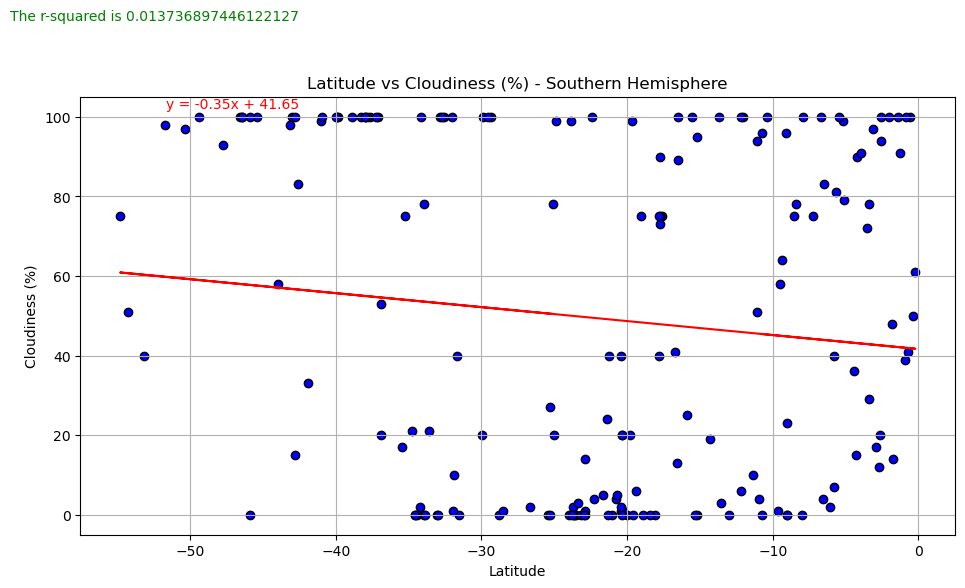

In [184]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression_plot(x_values, y_values, x_label="Latitude", y_label="Cloudiness (%)", title=(f"Latitude vs Cloudiness (%) - Southern Hemisphere"))

**Discussion about the linear relationship:** There seems to be a slight trend of cloudiness increasing as you approach the equator in the northern hemisphere and there seems to be a slight trend of cloudiness increasing as you head further away from them the equator in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is 0.0013530405516901716


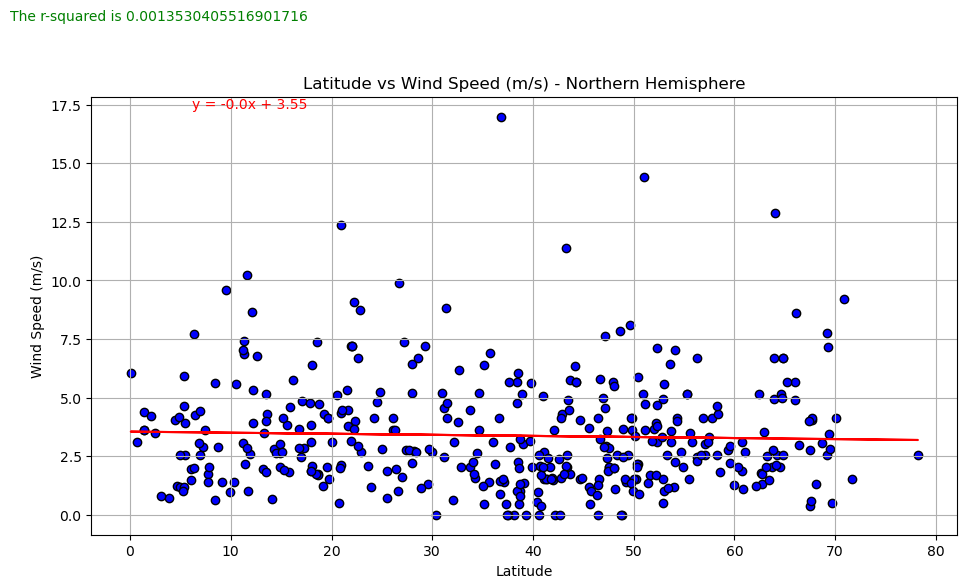

In [185]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression_plot(x_values, y_values, x_label="Latitude", y_label="Wind Speed (m/s)", title=(f"Latitude vs Wind Speed (m/s) - Northern Hemisphere"))

The r-squared is 0.00022724159742259543


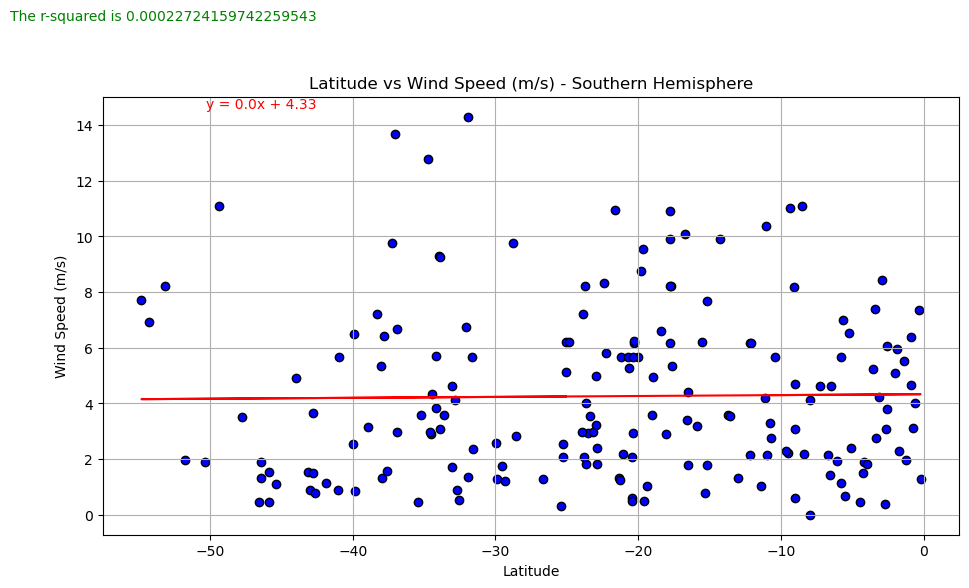

In [186]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression_plot(x_values, y_values, x_label="Latitude", y_label="Wind Speed (m/s)", title=(f"Latitude vs Wind Speed (m/s) - Southern Hemisphere"))

**Discussion about the linear relationship:** No relationship between latitude and wind speed of the northern and southern hemispheres.